<a href="https://colab.research.google.com/github/vdyakushina/Scientific-Python/blob/main/Final_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Task 1.

In [ ]:
#!pip install cobra
#import cobra
#from cobra.medium import minimal_medium
model = cobra.io.read_sbml_model("RAW264_7.xml")

In [81]:
medium = model.medium
model.medium = medium
max_growth = model.slim_optimize()
minimal_medium_aerobic = minimal_medium(model, max_growth)
anaerobic = [[el,f] for el, f in minimal_medium_anaerobic.iteritems()]
aerobic = [[el,f] for el, f in minimal_medium_aerobic.iteritems()]

In [82]:
medium = model.medium
medium["EX_o2_LPAREN_e_RPAREN_"] = 0.0
model.medium = medium
max_growth = model.slim_optimize()
minimal_medium_anaerobic = minimal_medium(model, max_growth)
anaerobic = [[el,f] for el, f in minimal_medium_anaerobic.iteritems()]

In [83]:
comp = []
for el_a in anaerobic:
    for el_n in aerobic:
        if el_a[0] == el_n[0]:
            comp.append([el_n[0], el_n[1], el_a[1]])
els_aerobic = [second for first, second, third in comp]
els_anaerobic = [third for first, second, third in comp]
indexes = [first for first, second, third in comp]

## Task 3

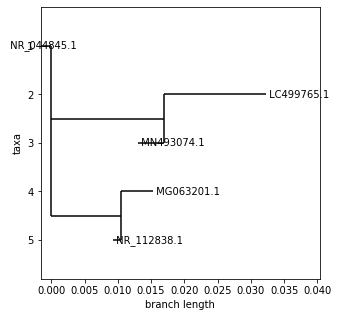

In [162]:
#!pip install Bio
from Bio import Phylo
from Bio import SeqIO
tree = Phylo.read("/content/drive/MyDrive/Colab Notebooks/Sci Pyth/aeromonade.dnd", "newick")
tree.ladderize() 
Phylo.draw(tree)

In [145]:
from Bio import AlignIO
align = AlignIO.read("/content/drive/MyDrive/Colab Notebooks/Sci Pyth/aeromonade.aln", "clustal")
print(align[0].id, align[0].seq)
print(align[1].id,align[1].seq)
print(align[2].id,align[2].seq)
print(align[3].id,align[3].seq)
print(align[4].id,align[4].seq)

MG063201.1 --------------------------------------GACTA-CACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGGCGAGCGGCGGACGGGTGAGTAATGCCTGGGGATCTGCCCAGTCGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATACGCCCTACGGGGGAAAGCAGGGGACCTTCGGGCCTTGCGCGATTGGATGAACCCAGGTGGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCCTAGCTGGTCTGAGAGGATGATCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCCATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTCAGCGAGGAGGAAAGGTTGGTAGCTAATAACTGCCAGCTGTGACGTTACTCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTGGATAAGTTAGATGTGAAATCCCCGGGCTCAACCTGGGAATTGCATTTAAAACTGTCCAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGAGAAAGCGTGGGGAGCAAACAGGATTAGATACCGTGGTAGTCCACGCCGTAAACGATGTCGATTTGGAGGCTGTGTCCTTGAGACGTGGTTTCCGGAGCTAACGCGTTAAATTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGCCTTGA

motif: 'AAACGATGTCGATTTGGAGGCTGTGTCCTTGAGACGTGGCTTCCGGAGCTAACGCGTTAAATCGACCGC'

## Task2

In [133]:
import os
import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
import seaborn as sns
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn import tree
rcParams['figure.figsize'] = (5, 5)
os.chdir("/content/drive/MyDrive/Colab Notebooks/Sci Pyth")

In [59]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

X_var, y_var = load_breast_cancer(return_X_y=True)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_var, 
                                                    y_var, 
                                                    test_size = 0.3)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.98      0.96      0.97       114

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



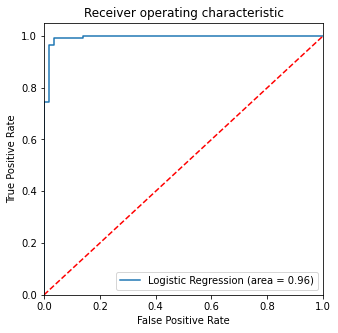

In [118]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)
print(cl(classification_report(y_test, yhat), attrs = ['bold']))


logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        57
           1       0.98      0.93      0.95       114

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



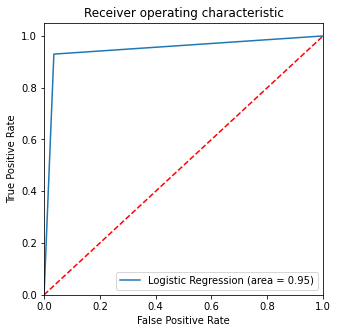

In [134]:
clf_dt = tree.DecisionTreeClassifier(criterion="entropy")
clf_dt.fit(X_train,y_train)
yhat_dt = clf_dt.predict(X_test)
yhat_prob_dt = clf_dt.predict_proba(X_test)
print(classification_report(y_test, yhat_dt))


roc_auc = roc_auc_score(y_test, yhat_dt)
fpr, tpr, thresholds = roc_curve(y_test, yhat_prob_dt[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()